## Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import cv2
from PIL import Image
import glob as gb
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, BatchNormalization, Dropout, ZeroPadding2D
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
sns.set(rc={'figure.figsize':(15,10)})

# get the data

In [ ]:
classes = ['NORMAL', 'PNEUMONIA']
img_size = 227

### Function to get images

In [ ]:
def get_images(path):
  data = []
  for label in classes:
    # get all images in this file
    images = gb.glob(pathname=str(path + label + '/*.jpeg'))
    # get the index
    class_num = classes.index(label)
    # loop in all images
    for image in images:
      image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
      # get the width and height of image
      width, height = Image.open(image).size
      # to check if all image could resize
      if width >= 227 and height >= 227:
        resized_img = cv2.resize(image_array, (img_size, img_size))
        data.append([resized_img, class_num])
  return np.array(data)

In [ ]:
train = get_images('/gdrive/My Drive/chest_xray/train/')
test = get_images('/gdrive/My Drive/chest_xray/test/')
val = get_images('/gdrive/My Drive/chest_xray/val/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


# Get all images and append in one varibale for image and one for label

In [ ]:
x = []
y = []

for feature, label in train:
    x.append(feature)
    y.append(label)

for feature, label in test:
    x.append(feature)
    y.append(label)
    
for feature, label in val:
    x.append(feature)
    y.append(label)

# Convert to array and scale

In [ ]:
x = np.array(x) / 255

In [ ]:
y = np.array(y)

In [ ]:
display(x.shape)
y.shape

(5815, 227, 227)

(5815,)

# Reshap data

In [ ]:
x = x.reshape(-1, 227, 227, 1)
x.shape

(5815, 227, 227, 1)

## Split data

In [ ]:
x_train, xtest, y_train, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train = np_utils.to_categorical(y_train)

## Model architecture

In [ ]:
model = models.Sequential()

model.add(Input(shape=(227, 227, 1)))

model.add(ZeroPadding2D((1,1)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

model.add(ZeroPadding2D((1,1)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

model.add(ZeroPadding2D((1,1)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

model.add(ZeroPadding2D((1,1)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

model.add(ZeroPadding2D((2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))



model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = "softmax"))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callback = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy'),
            tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 1, factor=0.25, verbose=1)]

In [ ]:
history = model.fit(x_train, y_train, batch_size=8, epochs=1000, validation_split=0.2, callbacks=callback)

Epoch 1/1000
466/466 [==============================] - 26s 29ms/step - loss: 1.0841 - accuracy: 0.8347 - val_loss: 0.3775 - val_accuracy: 0.8743 - lr: 0.0010
Epoch 2/1000
466/466 [==============================] - 13s 27ms/step - loss: 0.2900 - accuracy: 0.9062 - val_loss: 0.1693 - val_accuracy: 0.9431 - lr: 0.0010
Epoch 3/1000
465/466 [============================>.] - ETA: 0s - loss: 0.2026 - accuracy: 0.9333
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
466/466 [==============================] - 13s 27ms/step - loss: 0.2025 - accuracy: 0.9334 - val_loss: 0.4581 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 4/1000
466/466 [==============================] - 13s 27ms/step - loss: 0.1144 - accuracy: 0.9586 - val_loss: 0.0978 - val_accuracy: 0.9667 - lr: 2.5000e-04
Epoch 5/1000
464/466 [============================>.] - ETA: 0s - loss: 0.0896 - accuracy: 0.9693
Epoch 5: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
466/466 [=================

# Evaluate data

## loss and accuracy plot

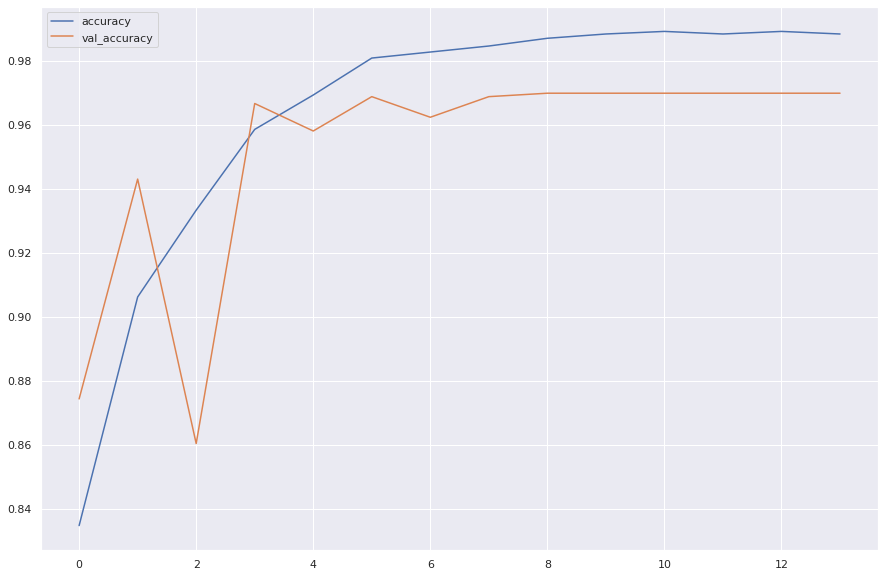

In [ ]:
#plot the accuracy
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label='accuracy')
plt.plot(history_df['val_accuracy'], label='val_accuracy')
plt.legend();

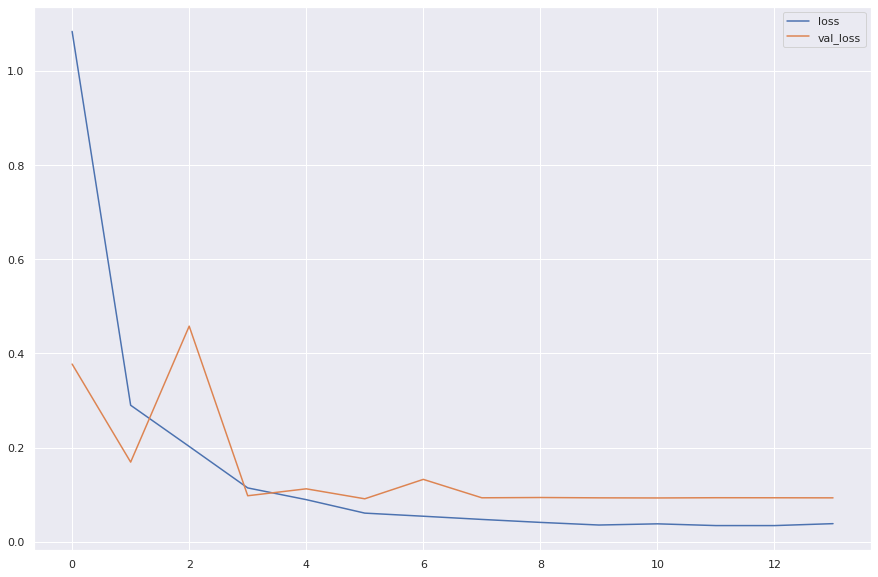

In [ ]:
#plot the loss
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.legend();

## Check evalute in train and test data

In [ ]:
# Train
loss, acc = model.evaluate(x_train, y_train)
print('Train')
print(f'loss : {loss}')
print(f'acc : {acc*100}')

146/146 [==============================] - 5s 31ms/step - loss: 0.0407 - accuracy: 0.9877
Train
loss : 0.04066304862499237
acc : 98.77471923828125


In [ ]:
# Test
loss, acc = model.evaluate(xtest, np_utils.to_categorical(ytest))
print('Test')
print(f'loss : {loss}')
print(f'acc : {acc*100}')

37/37 [==============================] - 1s 37ms/step - loss: 0.1421 - accuracy: 0.9527
Test
loss : 0.14208295941352844
acc : 95.27084827423096


In [ ]:
pred = model.predict(xtest)
pred

array([[3.5764793e-01, 6.4235204e-01],
       [9.9994040e-01, 5.9542490e-05],
       [4.5418352e-07, 9.9999952e-01],
       ...,
       [8.1400890e-07, 9.9999917e-01],
       [1.0205825e-09, 1.0000000e+00],
       [9.9993312e-01, 6.6842294e-05]], dtype=float32)

In [ ]:
prediction = np.argmax(pred, axis=-1)
prediction

array([1, 0, 1, ..., 1, 1, 0])

## Confusion matrix

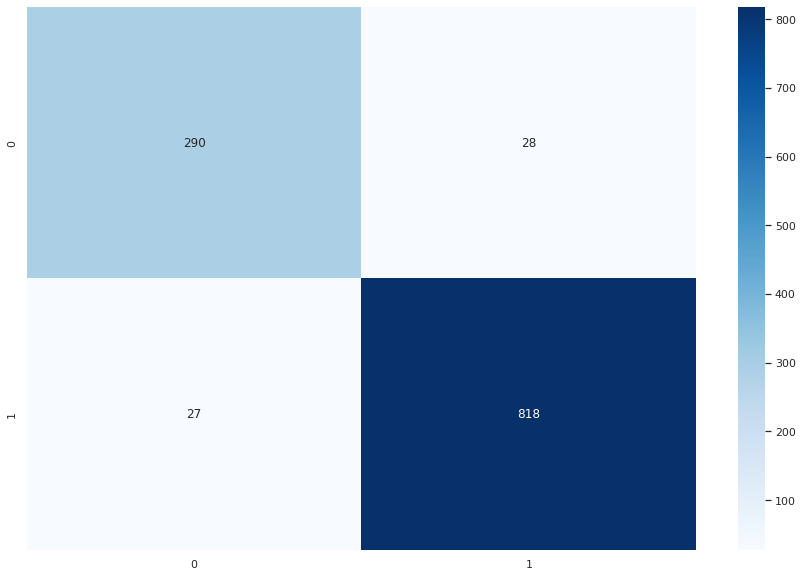

In [ ]:
sns.heatmap(confusion_matrix(prediction, ytest), annot=True, fmt='1', cmap='Blues');

## Recall and Precision

In [ ]:
print('Model Recall score  : {0:0.4f}'. format(recall_score(ytest, prediction,average='weighted')))
print('Model Precision  : {0:0.4f}'. format(precision_score(ytest, prediction,average='weighted')))

Model Recall score  : 0.9527
Model Precision  : 0.9528


# Right and Wrong prediction

In [ ]:
correct = np.nonzero(prediction == ytest)[0]
incorrect = np.nonzero(prediction != ytest)[0]

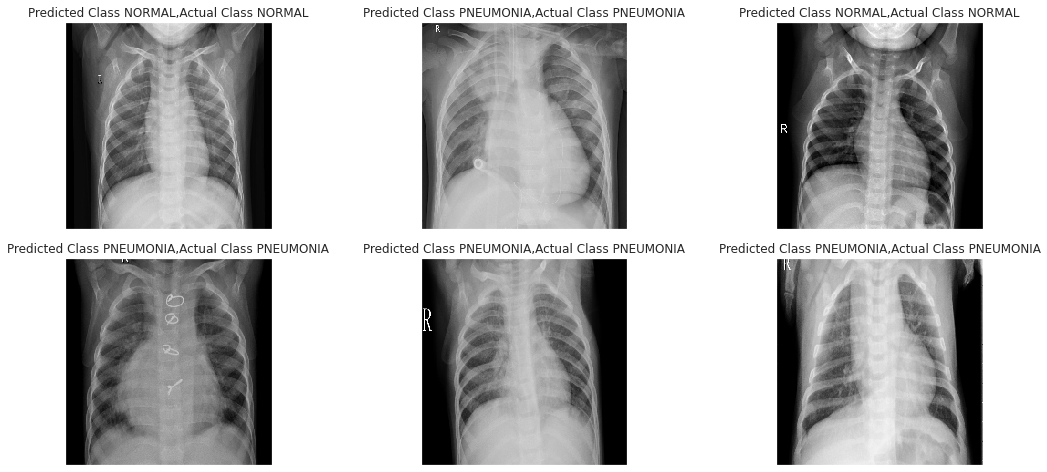

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,3,i+1)
    plt.imshow(xtest[c].reshape(227,227), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(classes[prediction[c]], classes[ytest[c]]))
    plt.tight_layout()
    i += 1

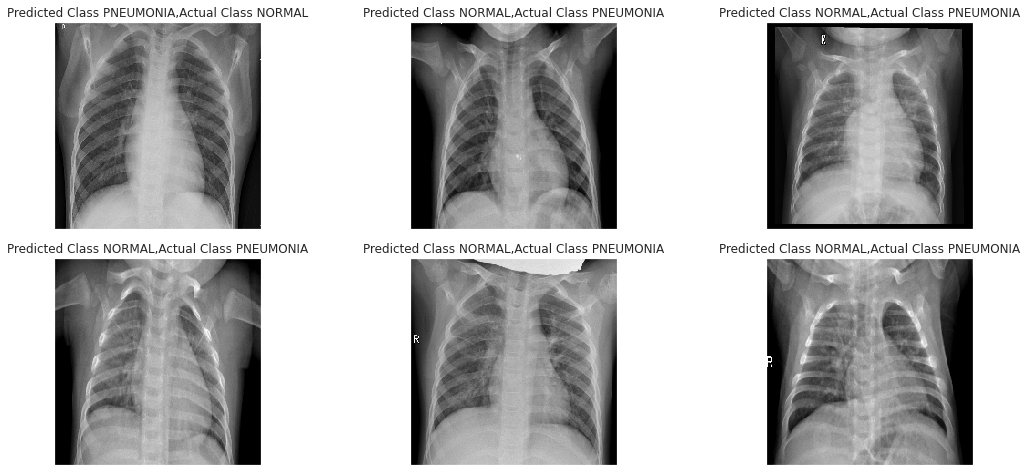

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,3,i+1)
    plt.imshow(xtest[c].reshape(227,227), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(classes[prediction[c]], classes[ytest[c]]))
    plt.tight_layout()
    i += 1